In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('/content/airbnb-data/raw_data.csv')

In [3]:
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
df.isnull().sum()

,0
id,0
NAME,91
host id,1
host_identity_verified,119
host name,96
neighbourhood group,28
neighbourhood,17
lat,9
long,9
country,88


In [6]:
df['id'].nunique()

26258

In [7]:
df.drop(['lat', 'long', 'country',
       'country code', 'minimum nights','calculated host listings count',
       'availability 365', 'house_rules', 'license'],axis=1, inplace = True )

In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'number of reviews', 'last review', 'reviews per month',
       'review rate number'],
      dtype='object')

In [9]:
df.rename(columns={ 'NAME': 'name','host_identity_verified': 'host identity verified', 'instant_bookable': 'instant bookable',
                   'cancellation_policy': 'cancellation policy','Construction year': 'construction year'}, inplace=True)

In [33]:
df.head(2)

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,instant bookable,cancellation policy,room type,construction year,price,service fee,number of reviews,last review,reviews per month,review rate number
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,1970-01-01,966.0,193.0,9.0,2021-10-19,0.21,4.0
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,1970-01-01,142.0,28.0,45.0,2022-05-21,0.38,4.0


In [30]:
df.dtypes

,0
id,int64
name,object
host id,float64
host identity verified,object
host name,object
neighbourhood group,object
neighbourhood,object
instant bookable,object
cancellation policy,object
room type,object


In [27]:
# df['construction year'] = df['construction year'].fillna(0).astype(int)

In [25]:
df['construction year'] = pd.to_datetime(df['construction year'].astype(str).str[:4], errors='coerce')
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')

In [ ]:
df['reviews per month'] = (df['reviews per month']).astype(float)

In [28]:
df['price'] = df['price'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)
df['service fee'] = df['service fee'].replace({'\$': '', ',': '', '':' '}, regex = True).astype(float)

In [31]:
df.fillna({'reviews per month': '0', 'last review': df['last review'].min()}, inplace = True)

In [37]:
df.isnull().sum()

,0
id,0
name,0
host id,0
host identity verified,0
host name,0
neighbourhood group,0
neighbourhood,0
instant bookable,0
cancellation policy,0
room type,0


In [ ]:
df.dropna(subset=['name', 'host name'], inplace=True)
df['host identity verified'].fillna('Unknown', inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)  # Fill with mean
df['service fee'].fillna(df['service fee'].median(), inplace=True)  # Fill with median
df['review rate number'].fillna(0, inplace=True)

In [36]:
# Drop rows with any null values
df.dropna(inplace=True)
# Drop rows where any of the specific columns have null values
# df.dropna(subset=['neighbourhood group', 'instant bookable', 'cancellation policy'], inplace=True)


# Exploratory Data Analysis (EDA)

## Distribution of listing prices

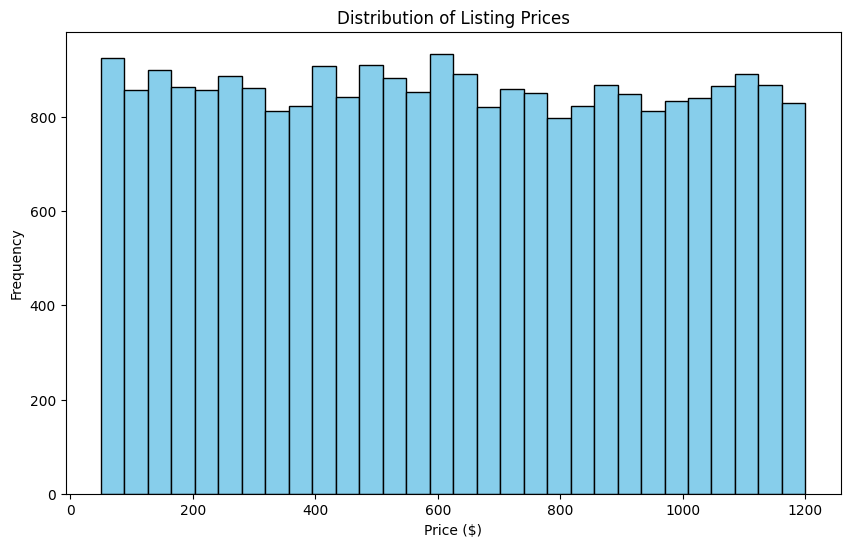

In [39]:
# plotting the distribution of prices
plt.figure( figsize=(10,6))
plt.hist(df['price'], bins= 30, edgecolor = 'black', color='skyblue')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()
plt.show()

This histogram shows the distribution of Airbnb listing prices, broken down by price range. The frequency of listings appears to be relatively even across the price bins. This suggests that listings across various price ranges are distributed evenly, with no particular cluster around a specific price point.

**Key Insights for Stakeholders:**

1. **Price Range Distribution**: There is a consistent distribution of listing prices, meaning Airbnb offers a variety of options across all price ranges.

2. **Market Segment Coverage**: The even distribution indicates that Airbnb’s market covers a broad spectrum, catering to different customer segments, from budget-conscious travelers to higher-end ones.

3. **Opportunity for Targeting**: This can inform pricing strategies and marketing campaigns aimed at specific price ranges or customer types. For instance, if you're targeting mid-range customers, you can focus on the price ranges where listings appear most frequently.

This distribution insight could be helpful when deciding on adjustments to pricing strategies or creating special offers.

<ipython-input-40-46e80a95ca28>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True, color='skyblue')


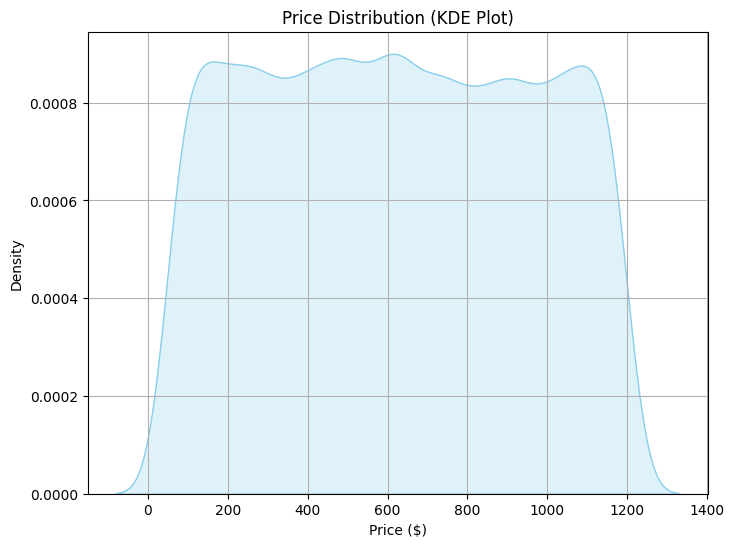

In [40]:
# Plotting the KDE plot of the price distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(df['price'], shade=True, color='skyblue')
plt.title('Price Distribution (KDE Plot)')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## How are different room types distributed?

In [41]:
# Count the occurrences of each room type
room_type_counts = df['room type'].value_counts()
print(room_type_counts)

room type
Entire home/apt    13855
Private room       11534
Shared room          424
Name: count, dtype: int64


<ipython-input-42-00fd795708f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='Set2')


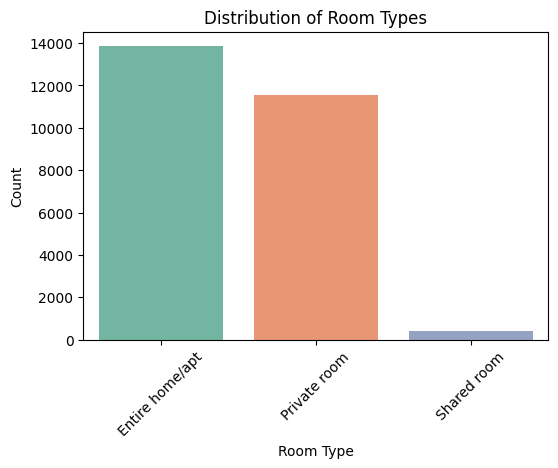

In [42]:
# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='Set2')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar plot shows the distribution of room types across the dataset. Here's what the plot indicates:

**Entire home/apt**: The majority of the listings (more than 17,500) are
entire homes or apartments. This room type is by far the most popular choice on the platform.

**Private room**: The second most common room type is private rooms, with just under 10,000 listings.

**Shared room**: Shared rooms are the least common type of room available, with very few listings (less than 1,000).

**Interpretation for Stakeholders**:

1. The dataset suggests that Airbnb hosts prefer offering entire homes or apartments, which indicates a strong demand for more private accommodations.

2. Private rooms are also a significant portion of listings, which shows that a good number of hosts offer shared living spaces but with more privacy.

3. Shared rooms are rare, indicating that they are less popular or perhaps limited in availability on Airbnb.

This insight could help the business understand market trends and potentially guide the types of accommodations to focus on.

## How are listings distributed across different neighborhoods?

In [43]:
# Get the top 20 neighborhoods based on the number of listings
top_neighborhoods = df['neighbourhood'].value_counts().head(20)
print(top_neighborhoods)

neighbourhood
Williamsburg          2266
Bedford-Stuyvesant    1926
Harlem                1525
Bushwick              1199
Upper West Side       1194
East Village          1136
Upper East Side       1042
Crown Heights          927
Hell's Kitchen         876
Midtown                690
Greenpoint             678
East Harlem            596
Chelsea                592
Lower East Side        534
Washington Heights     509
Astoria                498
West Village           473
Clinton Hill           373
Flatbush               357
Park Slope             344
Name: count, dtype: int64


<ipython-input-44-36c18053ea6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_neighborhoods.index, x=top_neighborhoods.values, palette='Set2')


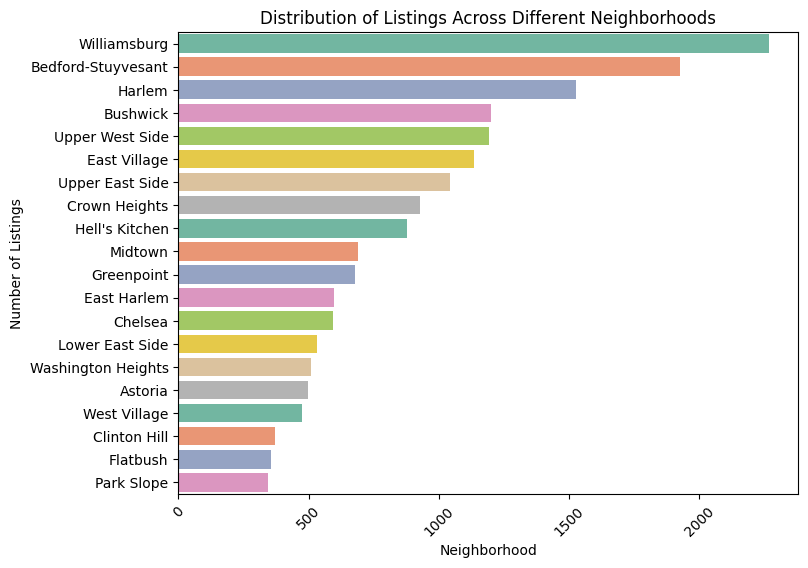

In [44]:
# Plot the distribution of listings across neighborhoods
plt.figure(figsize=(8, 6))
sns.barplot(y=top_neighborhoods.index, x=top_neighborhoods.values, palette='Set2')
plt.title('Distribution of Listings Across Different Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

This plot shows the distribution of Airbnb listings across different neighborhoods. Here’s what we can infer:

**Williamsburg** stands out as the neighborhood with the highest number of listings, followed by **Bedford-Stuyvesant**. Both neighborhoods have significantly more listings than the rest.

Manhattan neighborhoods, including **Harlem**, **Upper West Side**, and **East Village**, also have a notable number of listings.

Other neighborhoods like **Greenpoint**, E**ast Harlem**, and **Crown Heights** show a moderate number of listings.

The rest of the neighborhoods, especially those like **Prospect-Lefferts Gardens** and **Clinton Hill**, have much fewer listings.

In short, **Williamsburg** dominates the listings in this dataset, indicating it could be a highly popular area for Airbnb hosts in the city. On the other hand, many other neighborhoods show fewer listings, possibly due to lower demand or less development in those areas.

This analysis is useful for stakeholders to understand which areas are attracting more listings and could help in identifying trends and making informed decisions about property investments or expansion.

## Explore the relationship between price and room type

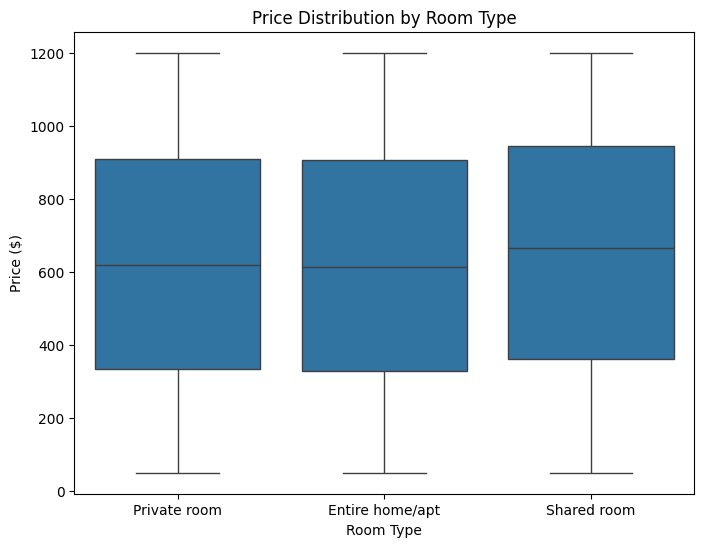

In [45]:
# Creating a boxplot to see the relationship between price and room type
plt.figure(figsize=(8, 6))
sns.boxplot(x='room type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

The box plot indicates that the Private room and Entire home/apt room types have a very similar price distribution. The **Shared room** box plot also indicates a higher median than 600, and it seems there is some overlap in the price distributions for all room types.

* **Private room** and **Entire home/apt** have similar price distributions, with median values around 600. However, the Private room has a wider range (from the box plot’s interquartile range), showing more price variability.

* **Shared room**, while seeming to have a narrower range compared to **Private room**, still has a median that is above **600**. This suggests that shared rooms in your dataset also come with a range of prices that is higher than expected, meaning shared rooms are not necessarily cheaper than private rooms in every case.

**Key Insights**:

**Shared rooms** could potentially have pricing fluctuations that are higher than typically expected, given the price range is overlapping with the other room types.

The **Private room** category might show a larger variance, as some private rooms are priced very high or very low compared to others, which reflects in its wider interquartile range.

In short, **Shared rooms** may not always be cheaper, and the plot reflects that there is significant price overlap across the different room types, indicating that price is not solely determined by the room type but may also depend on other factors such as location, amenities, or host-specific factors.

## How has the number of reviews changed over time?

In [66]:
df.head(2)

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,instant bookable,cancellation policy,room type,construction year,price,service fee,number of reviews,last review,reviews per month,review rate number
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,1970-01-01,966.0,193.0,9.0,2021-10-19,0.21,4.0
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,1970-01-01,142.0,28.0,45.0,2022-05-21,0.38,4.0


In [73]:
# Finding the minimum and maximum date in the 'last review' column
min_date = df['last review'].min()
max_date = df['last review'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)


Minimum date: 2012-07-11 00:00:00
Maximum date: 2021-12-10 00:00:00


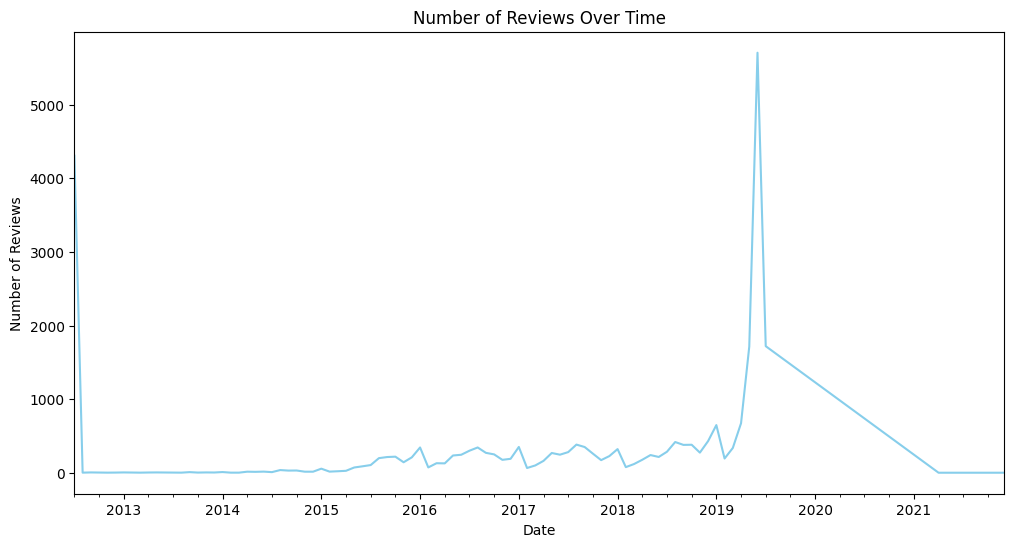

In [87]:
# Filter out rows with 'last review' in future
df = df[df['last review'] < '2022-01-01']

reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line', color='skyblue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


This plot shows the trend of the "Number of Reviews Over Time" from 2012 to 2021. Here’s what can be observed:

* **Steady Low Reviews (2012-2018)**: From 2012 until the end of 2018, the number of reviews remains consistently low, indicating that reviews were less frequent during this period. This suggests either fewer listings or lower engagement from users.

* **Sharp Increase in 2019**: Around 2019, there is a sudden and dramatic spike in the number of reviews. This may reflect a significant increase in the number of listings, higher activity, or promotional campaigns, leading to an influx of reviews.

* **Decline After 2019**: After the sharp peak in 2019, the number of reviews drops significantly, possibly due to external factors like the pandemic or changes in the platform's user engagement.

## Correlation Between Reviews and Price

Correlation between Price and Number of Reviews: 0.00463245680407781


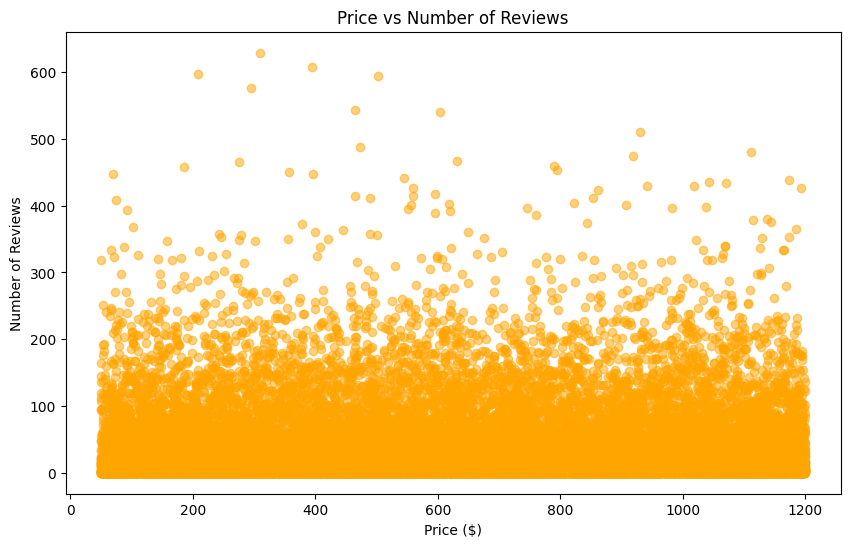

In [99]:
# Calculate the correlation between price and number of reviews
correlation = df['price'].corr(df['number of reviews'])

print(f"Correlation between Price and Number of Reviews: {correlation}")

# Plot the scatter plot to see the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['number of reviews'], alpha=0.5, color='orange')
plt.title('Price vs Number of Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.show()


From the correlation value and scatter plot, we can conclude that there is a very weak correlation between price and the number of reviews. The correlation value is **0.0046**, which is close to zero, indicating almost no linear relationship between the price and the number of reviews.

**Insights from this analysis**:

1. **Price is not a strong factor for attracting reviews**: Whether the price of a listing is high or low, it does not seem to have a significant impact on how many reviews it receives. This could imply that factors other than price, such as location, room type, and amenities, might be more important for attracting guests and reviews.

2. **No clear pattern**: The scatter plot also shows a random distribution of reviews across all price points, confirming that there is no visible pattern between higher or lower prices and the frequency of reviews.

This could suggest that Airbnb may need to focus on other aspects (e.g., the quality of the listing, host experience, or specific features) to generate more reviews, rather than adjusting prices alone.